In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [9]:
import pandas as pd

# Load the dataset from CSV
data = pd.read_csv(r"C:\Users\sasid\Downloads\archive (1)\supermarket_sales - Sheet1.csv")

# Display basic information about the dataset
print(data.head())


    Invoice ID Branch       City Customer type  Gender   
0  750-67-8428      A     Yangon        Member  Female  \
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date   
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019  \
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M %p')

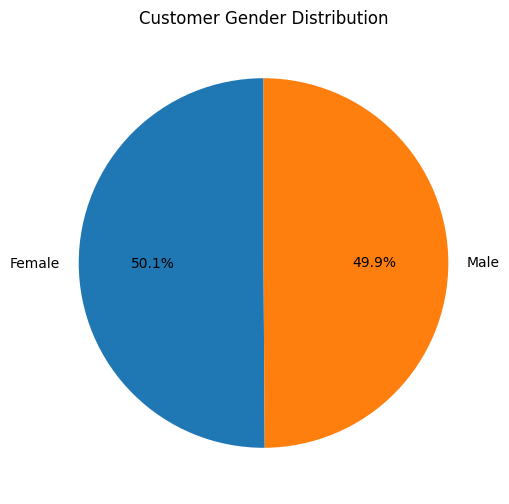

In [11]:
# Calculate the percentage of male and female customers
gender_percentage = data['Gender'].value_counts(normalize=True) * 100



# Visualize the gender distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.show()


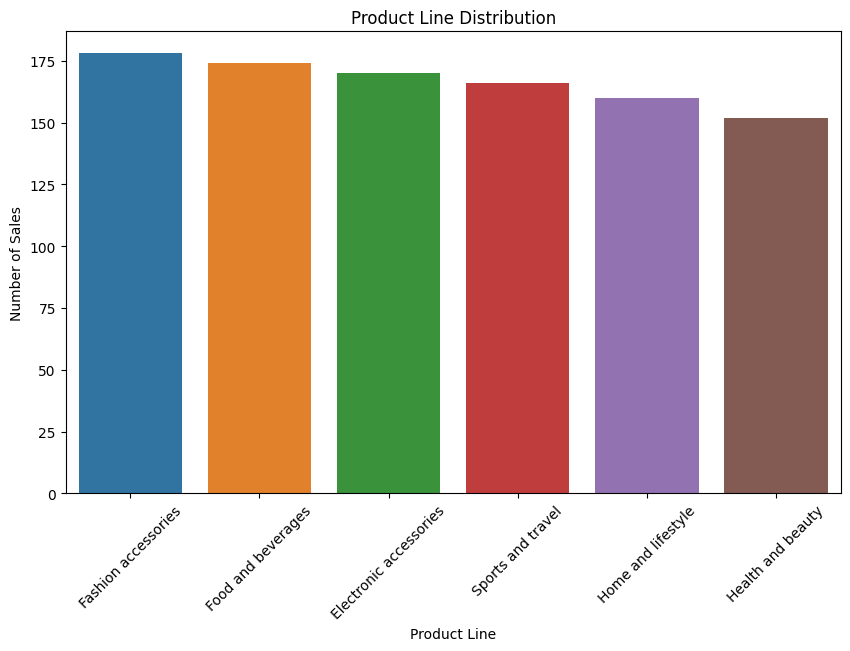

In [20]:
# Explore the distribution of products across different product lines
product_line_distribution = data['Product line'].value_counts()

# Create a bar chart to visualize the product line distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_distribution.index, y=product_line_distribution.values)
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Number of Sales')
plt.title('Product Line Distribution')
plt.show()


In [22]:
# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values by removing rows with missing values or imputing them
# Example: Remove rows with any missing values
data_cleaned = data.dropna()

# Display basic information about the cleaned dataset
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

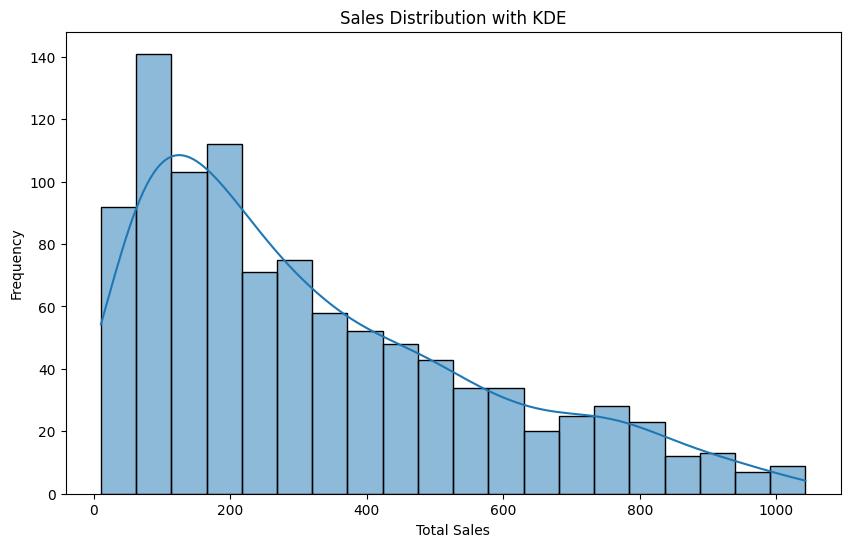

In [24]:
# Plot histogram and KDE plot for sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=20, kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution with KDE')
plt.show()


C:\Users\sasid\AppData\Local\Temp\ipykernel_14772\1592156000.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Product line', y='Total', hue='Gender', ci=None)


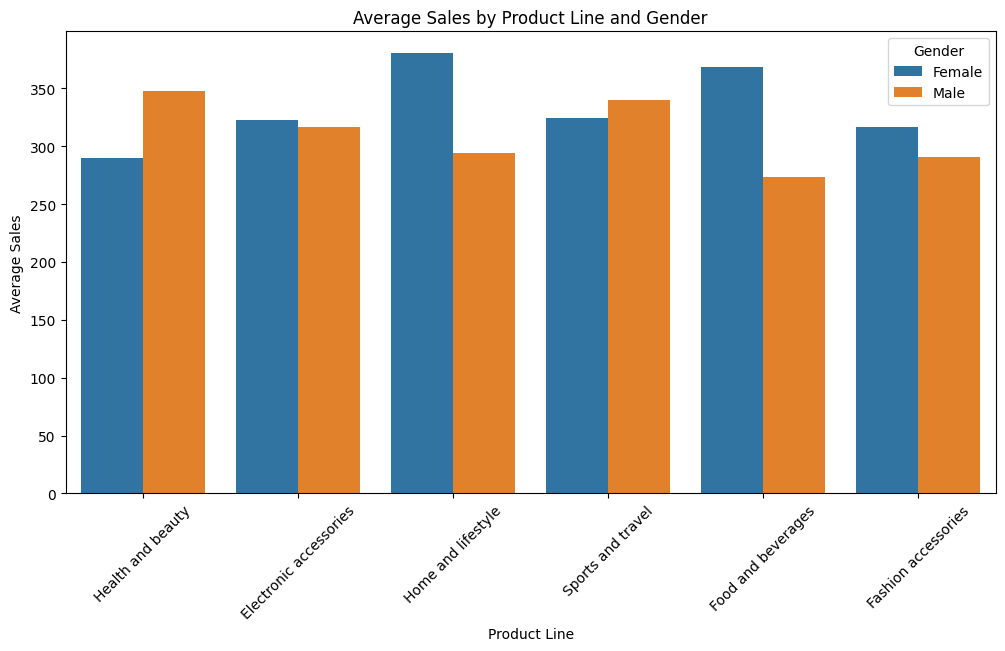

In [26]:
# Create a grouped bar plot for average sales across product lines and genders
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Product line', y='Total', hue='Gender', ci=None)
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.title('Average Sales by Product Line and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


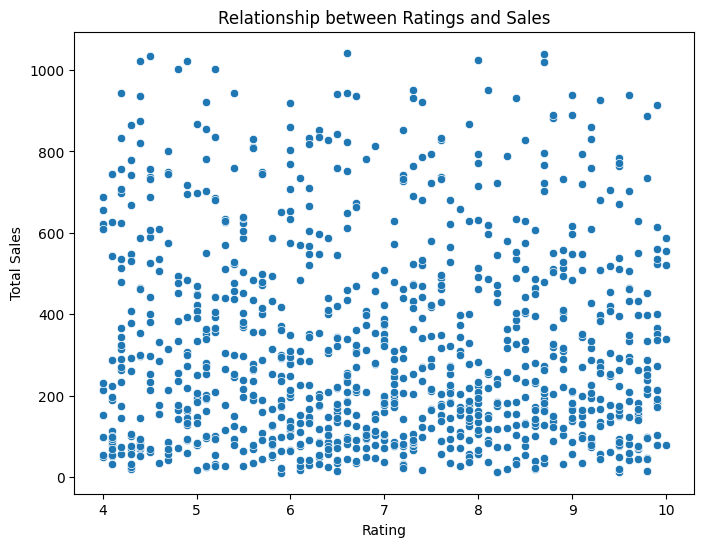

Average Rating: 6.97
Correlation between Ratings and Sales: -0.04


In [27]:
# Calculate the average rating given by customers
average_rating = data['Rating'].mean()

# Calculate the correlation between ratings and sales
correlation = data['Rating'].corr(data['Total'])

# Visualize the relationship between ratings and sales using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Rating', y='Total')
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title('Relationship between Ratings and Sales')
plt.show()

# Display average rating and correlation
print(f"Average Rating: {average_rating:.2f}")
print(f"Correlation between Ratings and Sales: {correlation:.2f}")


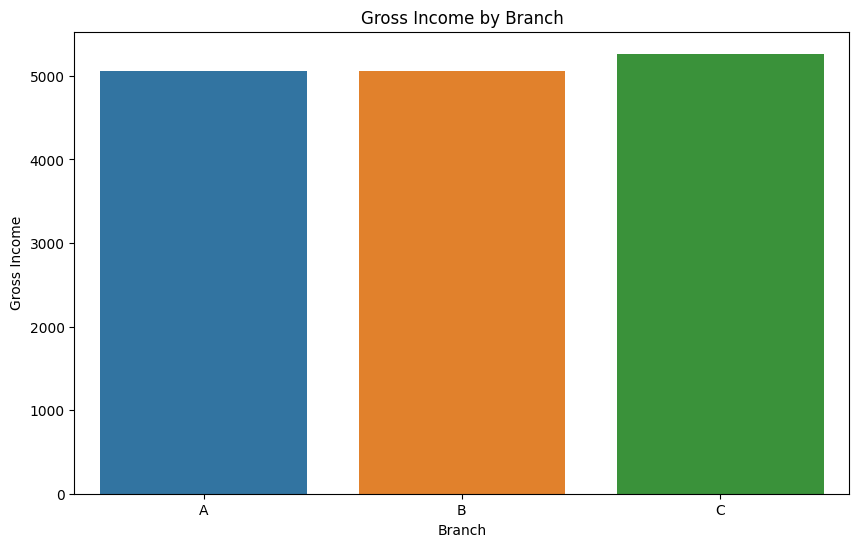

In [28]:
# Calculate the gross income for each transaction
data['Gross Income'] = data['Total'] - data['cogs']

# Calculate the total gross income for each branch
branch_gross_income = data.groupby('Branch')['Gross Income'].sum()

# Create a bar plot to visualize gross income by branch
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_gross_income.index, y=branch_gross_income.values)
plt.xlabel('Branch')
plt.ylabel('Gross Income')
plt.title('Gross Income by Branch')
plt.xticks(rotation=0)
plt.show()
